# **(Worse than just using adamw, so I deprecate it.)**

# **Add parent directory to python path**

In [1]:
import os
import sys

parent_dir = os.path.join(os.getcwd(), '..')
sys.path.append(parent_dir)

# **Logger setting**

In [2]:
import logging

logger = logging.getLogger()

chandler = logging.StreamHandler()
chandler.setLevel(logging.DEBUG)

logger.addHandler(chandler)
logger.setLevel(logging.INFO)

# **Define the training config**

In [6]:
from matplotlib import pyplot as plt
import torch
import numpy as np

from recanime.training.trainer import NoamOpt
from recanime.schema.training import TrainingConfig

training_config = TrainingConfig(
    input_lengths=50,
    batch_size=64,
    epochs=10,
    n_workers=4,   
    model_size=1000,
    lr_factor=2.,
    lr_warm_up=2000
)

dummy_model = torch.nn.Linear(10, 10)

# **Plot the optimizer learning rate schedule**

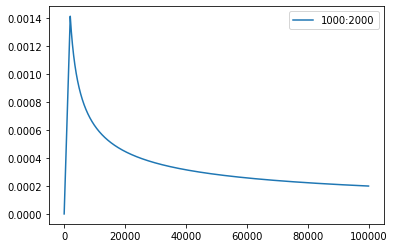

In [7]:
optimizer = NoamOpt(
    **training_config.get_optimizer_config(),
    optimizer=torch.optim.AdamW(dummy_model.parameters(), lr=0, betas=(0.9, 0.98), eps=1e-9, weight_decay=0.0001))
plt.plot(np.arange(1, 100000), [optimizer.rate(i) for i in range(1, 100000)])
plt.legend([f"{optimizer.model_size}:{optimizer.warmup}"])